In [65]:
#Загрузка библиотек
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark-palette')

C:\Users\79160\AppData\Local\Temp/ipykernel_9664/2514562427.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


In [99]:
#Загрузка подготовленных датасетов

upd_games_df = pd.read_csv('upd_games_df.csv')
upd_moves_df = pd.read_csv('upd_moves_df.csv')

#Уберем первую колонку и удебимся, что в датасете выбраны только нужные колонки

upd_games_df = upd_games_df.drop(columns = ['Unnamed: 0'])
upd_games_df = upd_games_df[['game_id', 'event', 'white', 'black', 'result', 'white_elo',
       'black_elo', 'winner_loser_elo_diff', 'eco', 'termination', 'time_control', 'op']]
upd_moves_df = upd_moves_df.drop(columns = ['Unnamed: 0'])

#Переводим необходимые переменные к нужному формату, удаляем пропуски

upd_games_df.loc[upd_games_df['black_elo'] == '?', 'black_elo'] # Индекс 147,gameid = af5a9fba-1575-4e62-899c-dc536fecba12
upd_games_df = upd_games_df.drop(index = 147, axis = 0)
upd_moves_df[upd_moves_df['game_id'] == 'af5a9fba-1575-4e62-899c-dc536fecba12'] #Индексы от 10247 до 10406
upd_moves_df = upd_moves_df.drop(index = range(10247,10407), axis = 0)

upd_games_df['white_elo'] = upd_games_df['white_elo'].astype(int)
upd_games_df['black_elo'] = upd_games_df['black_elo'].astype(int)



print(upd_games_df.shape, upd_moves_df.shape)

(1651, 12) (112710, 65)


In [100]:
#Дополнительно преобразуем колонку с типами игр
x = upd_games_df['event'].to_frame()
x[['A', 'B']] = x['event'].str.split('https', 1, expand=True)
upd_games_df['event'] = x['A']

In [102]:
#Проверим сохранность датасета
upd_moves_df['game_id'].nunique(),upd_games_df['game_id'].nunique() 

(1651, 1651)

In [103]:
#Проверим типы переменных
upd_games_df.dtypes

game_id                  object
event                    object
white                    object
black                    object
result                   object
white_elo                 int32
black_elo                 int32
winner_loser_elo_diff     int64
eco                      object
termination              object
time_control             object
op                       object
dtype: object

In [104]:
print(upd_games_df.columns)
upd_games_df.head()

Index(['game_id', 'event', 'white', 'black', 'result', 'white_elo',
       'black_elo', 'winner_loser_elo_diff', 'eco', 'termination',
       'time_control', 'op'],
      dtype='object')


,game_id,event,white,black,result,white_elo,black_elo,winner_loser_elo_diff,eco,termination,time_control,op
0,ec0dd743-98dc-49dd-bb50-0bbede2d62c7,Rated Blitz game,Aceves,Escalante,1-0,1502,1418,84,D02,Time forfeit,180+0,Queen's Pawn Game: Chigorin Variation
1,1d7bd19f-58f2-4b84-9d2c-48752e97f8c7,Rated Bullet game,jodeldrum,shaf,1-0,2012,2211,-199,B02,Normal,0+1,Alekhine Defense: Maroczy Variation
2,d05c2e63-5afe-42ed-b726-96b4ab16aca2,Rated Bullet game,jodeldrum,shaf,0-1,2023,2200,177,C01,Normal,0+1,French Defense: Exchange Variation
3,e99fc221-6855-439e-817d-b8317758df0c,Rated Classical game,Iron_Master,tose,1-0,1745,1801,-56,C64,Normal,900+0,"Ruy Lopez: Classical Variation, Cordel Gambit"
4,2714f25c-e2ff-45d0-9ec4-a5824c652247,Rated Classical game,tose,Iron_Master,0-1,1788,1768,-20,B30,Normal,900+0,Sicilian Defense: Old Sicilian


In [105]:
print(upd_moves_df.columns)
upd_moves_df.head()

Index(['game_id', 'move_no', 'move_no_pair', 'player', 'notation', 'move',
       'from_square', 'to_square', 'piece', 'color', 'fen', 'is_check',
       'is_check_mate', 'is_fifty_moves', 'is_fivefold_repetition',
       'is_game_over', 'is_insufficient_material', 'white_count',
       'black_count', 'white_pawn_count', 'black_pawn_count',
       'white_queen_count', 'black_queen_count', 'white_bishop_count',
       'black_bishop_count', 'white_knight_count', 'black_knight_count',
       'white_rook_count', 'black_rook_count', 'captured_score_for_white',
       'captured_score_for_black', 'fen_row1_white_count',
       'fen_row2_white_count', 'fen_row3_white_count', 'fen_row4_white_count',
       'fen_row5_white_count', 'fen_row6_white_count', 'fen_row7_white_count',
       'fen_row8_white_count', 'fen_row1_white_value', 'fen_row2_white_value',
       'fen_row3_white_value', 'fen_row4_white_value', 'fen_row5_white_value',
       'fen_row6_white_value', 'fen_row7_white_value', 'fen_row

,game_id,move_no,move_no_pair,player,notation,move,from_square,to_square,piece,color,...,fen_row1_black_value,fen_row2_black_value,fen_row3_black_value,fen_row4_black_value,fen_row5_black_value,fen_row6_black_value,fen_row7_black_value,fen_row8_black_value,move_sequence,eval
0,ec0dd743-98dc-49dd-bb50-0bbede2d62c7,1,1,Aceves,d4,d2d4,d2,d4,P,White,...,0,0,0,0,0,0,8,31,d4,-22
1,ec0dd743-98dc-49dd-bb50-0bbede2d62c7,2,1,Escalante,d5,d7d5,d7,d5,P,Black,...,0,0,0,0,1,0,7,31,d4|d5,24
2,ec0dd743-98dc-49dd-bb50-0bbede2d62c7,3,2,Aceves,Nf3,g1f3,g1,f3,N,White,...,0,0,0,0,1,0,7,31,d4|d5|Nf3,-25
3,ec0dd743-98dc-49dd-bb50-0bbede2d62c7,4,2,Escalante,Nc6,b8c6,b8,c6,N,Black,...,0,0,0,0,1,3,7,28,d4|d5|Nf3|Nc6,30
4,ec0dd743-98dc-49dd-bb50-0bbede2d62c7,5,3,Aceves,e3,e2e3,e2,e3,P,White,...,0,0,0,0,1,3,7,28,d4|d5|Nf3|Nc6|e3,-32


# Визуализация
*Так так как большое количество наблюдений (игр) из первоначального датасета было исключено в связи с отсутствием в них оценки ходов, необходимо разобраться, какие данные остались и как они распределены. Отметим, что в датасете осталось всего 1651 игра*


### Начнем с распределения рейтингов игроков

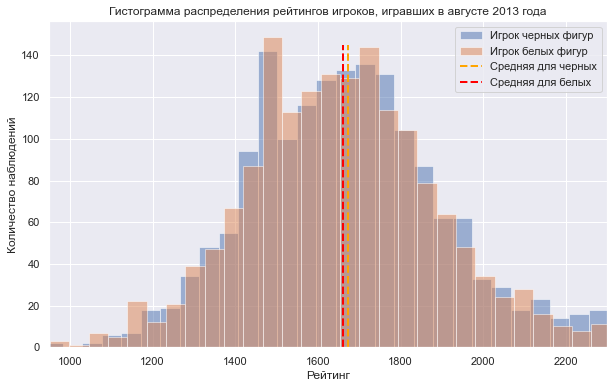

In [106]:
plt.figure(figsize=(10, 6))
plt.hist(upd_games_df['black_elo'], bins = 30, alpha = 0.5, rwidth = 2, label= 'Игрок черных фигур')
plt.hist(upd_games_df['white_elo'], bins = 30,alpha = 0.5, rwidth = 2, label= 'Игрок белых фигур')
plt.vlines(upd_games_df['black_elo'].mean(), 0, 145, color='orange', lw=2, linestyles='--', label='Средняя для черных')
plt.vlines(upd_games_df['white_elo'].mean(), 0, 145, color='red', lw=2, linestyles='--', label='Средняя для белых')
plt.show
plt.title(f'Гистограмма распределения рейтингов игроков, игравших в августе 2013 года')
plt.xlabel("Рейтинг")
plt.ylabel("Количество наблюдений")
plt.xlim((950, 2300))
plt.legend()
None

**Вывод**:

### Построим столбчатую диаграмму типов игр

In [125]:
upd_games_df['event'] = upd_games_df['event'].astype("category")
upd_games_df['event'].value_counts()

Rated Blitz game               639
Rated Bullet game              471
Rated Classical game           465
Rated Bullet tournament         42
Rated Blitz tournament          31
Rated Correspondence game        2
Rated Classical tournament       1
Name: event, dtype: int64

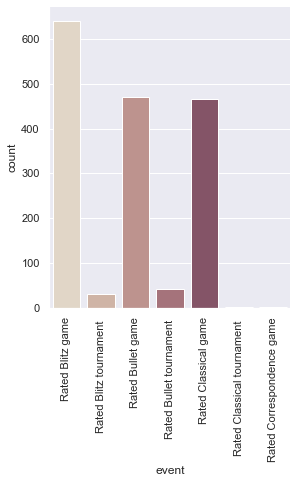

In [127]:
ax = sns.catplot(data = upd_games_df, x = 'event' , kind="count", palette="ch:.25")
plt.xticks(rotation=90)
None

### Построим столбчатую диаграмму выйгранных партий белыми и черными

In [107]:
upd_games_df['result'] = np.where(upd_games_df['result'] == '1-0', 'w', 'b')
upd_games_df['result'] = upd_games_df['result'].astype("category")
upd_games_df['result'].value_counts()

b    838
w    813
Name: result, dtype: int64

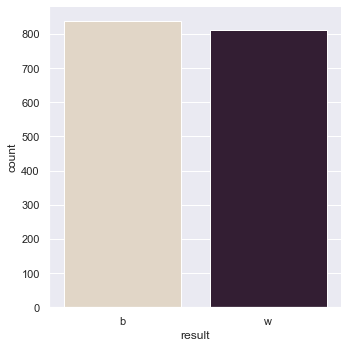

In [108]:
ax = sns.catplot(data = upd_games_df, x = 'result' , kind="count", palette="ch:.25")
None

**Вывод**:

### Построим столбчатую диаграмму распределения дебютов

In [109]:
#Всего в датасете представлено 573 уникальных дебюта, 275 из которых используются более 1 раза
upd_games_df['op'].value_counts()[:275]

Van't Kruijs Opening                             31
Sicilian Defense                                 31
Sicilian Defense: Bowdler Attack                 29
Modern Defense                                   28
Scandinavian Defense: Mieses-Kotroc Variation    27
                                                 ..
Scotch Game: Lolli Variation                      2
Queen's Pawn Game: Anglo-Slav Opening             2
French Defense: Schlechter Variation              2
Philidor Defense: Lion Variation                  2
Colle System                                      2
Name: op, Length: 275, dtype: int64

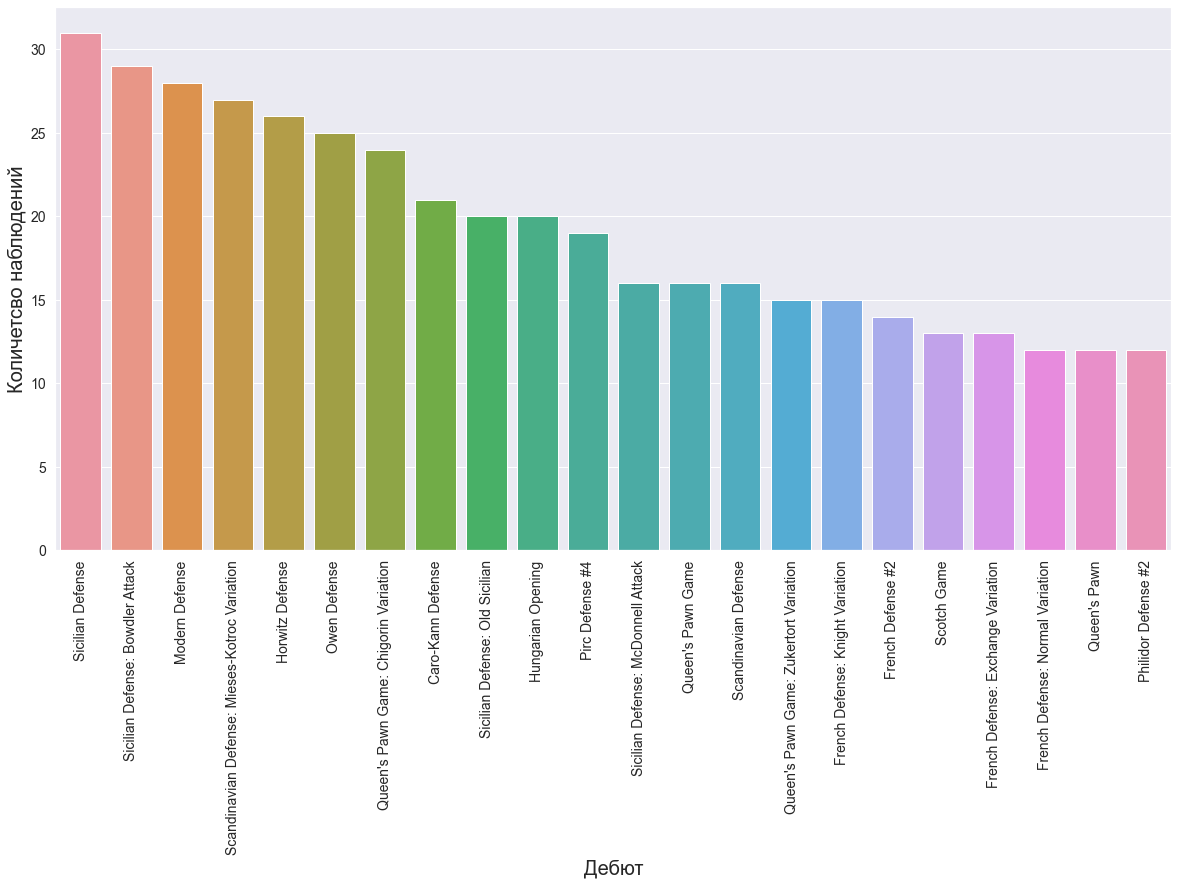

In [110]:
#Для качетсвенной визуализации выберем только те, которые используются более 10 раз (всего 23 вида)
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x = upd_games_df['op'].value_counts()[1:23].index, y = upd_games_df['op'].value_counts()[1:23].values)
plt.xticks(rotation=90)
plt.xlabel('Дебют', fontsize=20)
plt.ylabel('Количетсво наблюдений', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
None

### Построим столбчатую диаграмму распределения фигур, которыми чаще всего ходят игроки (можно сделать в зависимости от рейтинга) + еще не учтен тип игры, так как у каждого разные рейтинги

In [111]:
upd_moves_df['piece'] = upd_moves_df['piece'].astype("category")

P    31330
N    19566
B    17162
R    15942
K    14940
Q    13770
Name: piece, dtype: int64


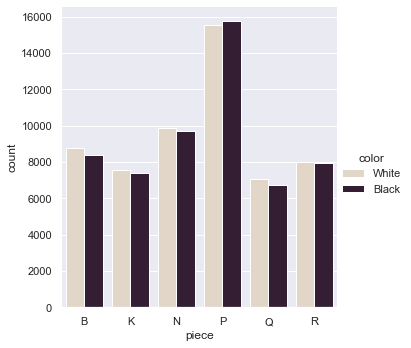

In [112]:
print(upd_moves_df['piece'].value_counts())
ax = sns.catplot(data = upd_moves_df, x = 'piece' , kind="count", palette="ch:.25", hue = 'color')
None

### Протестируем, как визуализируется оценка ходов на примере одной игры (в ней 75 ходов)
game_id = ec0dd743-98dc-49dd-bb50-0bbede2d62c7

### Идея - визуально сравнить графики оценок для разных категорий игроков в соответствии с рейтингом
В данном случае у игроков elo равны 1502 и 1418 - невысокие рейтиги, поэтому так оценки колбасит

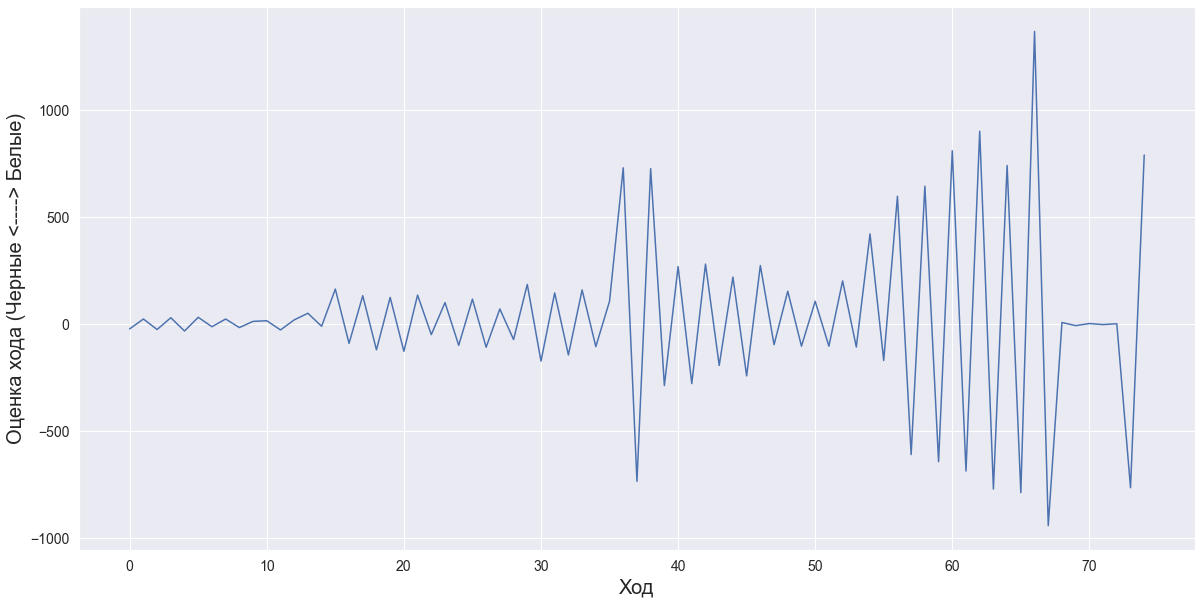

In [120]:
y = upd_moves_df[upd_moves_df['game_id'] == 'ec0dd743-98dc-49dd-bb50-0bbede2d62c7']['eval']
x = range(upd_moves_df[upd_moves_df['game_id'] == 'ec0dd743-98dc-49dd-bb50-0bbede2d62c7'].shape[0])
data_plot = pd.DataFrame({"Hod":x, "Eval":y})
sns.lineplot(x = "Hod", y = "Eval", data=data_plot)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Ход', fontsize=20)
plt.ylabel('Оценка хода (Черные <----> Белые)', fontsize=20)
None

In [121]:
upd_games_df[upd_games_df['game_id'] == 'ec0dd743-98dc-49dd-bb50-0bbede2d62c7']

,game_id,event,white,black,result,white_elo,black_elo,winner_loser_elo_diff,eco,termination,time_control,op
0,ec0dd743-98dc-49dd-bb50-0bbede2d62c7,Rated Blitz game,Aceves,Escalante,w,1502,1418,84,D02,Time forfeit,180+0,Queen's Pawn Game: Chigorin Variation


Для примера возьмем игроков с рейтингом > 2200

In [123]:
upd_games_df[upd_games_df['white_elo'] > 2200].head() #game_id = f69f7065-db14-413e-865c-5947d814b3e4

,game_id,event,white,black,result,white_elo,black_elo,winner_loser_elo_diff,eco,termination,time_control,op
19,248eb9f1-0cb0-4b2a-988d-48c874ced99b,Rated Blitz game,starkon,oven,w,2264,2044,220,D52,Normal,180+2,Queen's Gambit Declined: Cambridge Springs Def...
96,f69f7065-db14-413e-865c-5947d814b3e4,Rated Bullet game,shaf,screwball,b,2210,2218,8,A04,Normal,60+2,Zukertort Opening: Sicilian Invitation
196,3ee271c4-b57a-48e5-af67-f4c4ebfeede6,Rated Bullet game,pink_overdoze,TrialC,w,2328,1927,401,A08,Normal,120+0,King's Indian Attack: Sicilian Variation
197,73b983f3-b426-4cb2-a146-e684f14f80ec,Rated Bullet game,pink_overdoze,TrialC,w,2346,1914,432,A08,Time forfeit,120+0,King's Indian Attack
200,8bf0e618-19f2-48bb-a61e-7b81839ddf10,Rated Bullet game,pink_overdoze,TrialC,b,2326,1929,-397,C11,Normal,120+0,French Defense: Burn Variation


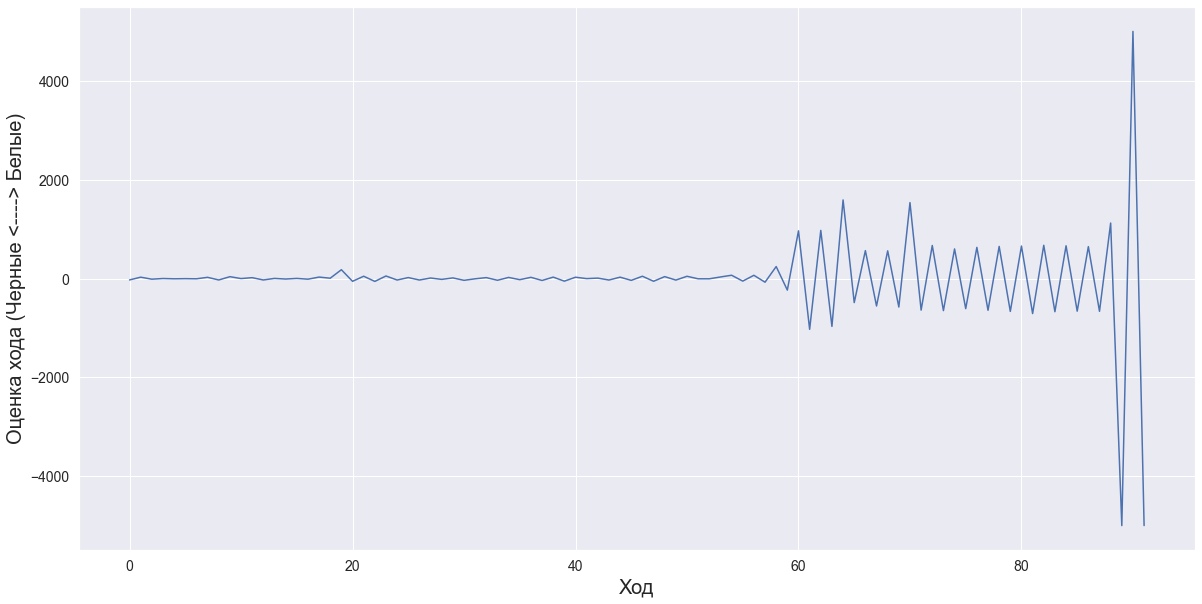

In [124]:
y = upd_moves_df[upd_moves_df['game_id'] == 'f69f7065-db14-413e-865c-5947d814b3e4']['eval']
x = range(upd_moves_df[upd_moves_df['game_id'] == 'f69f7065-db14-413e-865c-5947d814b3e4'].shape[0])
data_plot = pd.DataFrame({"Hod":x, "Eval":y})
sns.lineplot(x = "Hod", y = "Eval", data=data_plot)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Ход', fontsize=20)
plt.ylabel('Оценка хода (Черные <----> Белые)', fontsize=20)
None